## Import

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simple Linear Regression

## Health Plan Base

In [653]:
PATH_DATA_BASE = '../Machine Learning e Data Science com Python de A à Z/Bases de dados/'
base_health_plan = pd.read_csv(PATH_DATA_BASE+r'plano_saude.csv'.format(PATH_DATA_BASE))
base_health_plan

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [654]:
x_health_plan = base_health_plan.iloc[:,0].values
x_health_plan

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [655]:
y_health_plan = base_health_plan.iloc[:,1].values
y_health_plan

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [656]:
np.corrcoef(x_health_plan, y_health_plan)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [657]:
x_health_plan.shape

(10,)

In [658]:
x_health_plan = x_health_plan.reshape(-1,1)
x_health_plan

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [659]:
x_health_plan.shape

(10, 1)

In [660]:
from sklearn.linear_model import LinearRegression
regressor_health_plan = LinearRegression()
regressor_health_plan.fit(x_health_plan, y_health_plan)

LinearRegression()

In [661]:
regressor_health_plan.intercept_

-558.9490909090912

In [662]:
regressor_health_plan.coef_

array([61.86787879])

In [663]:
predictions = regressor_health_plan.predict(x_health_plan)
predictions

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

## Scatter 01

In [664]:
graphic = px.scatter(x = x_health_plan.ravel(), y = y_health_plan)
graphic.add_scatter(x = x_health_plan.ravel(), y = predictions, name = 'Regression')
graphic.update_layout(height= 650)
graphic.show()

In [665]:
regressor_health_plan.intercept_ + regressor_health_plan.coef_ * 18

array([554.67272727])

In [666]:
regressor_health_plan.intercept_ + regressor_health_plan.coef_ * 40

array([1915.76606061])

In [667]:
regressor_health_plan.predict([[40]])

array([1915.76606061])

In [668]:
ages = np.arange(1, 100, 1)
ages = ages.reshape(-1, 1)

In [669]:
predictions = regressor_health_plan.predict(ages)
predictions

array([-4.97081212e+02, -4.35213333e+02, -3.73345455e+02, -3.11477576e+02,
       -2.49609697e+02, -1.87741818e+02, -1.25873939e+02, -6.40060606e+01,
       -2.13818182e+00,  5.97296970e+01,  1.21597576e+02,  1.83465455e+02,
        2.45333333e+02,  3.07201212e+02,  3.69069091e+02,  4.30936970e+02,
        4.92804848e+02,  5.54672727e+02,  6.16540606e+02,  6.78408485e+02,
        7.40276364e+02,  8.02144242e+02,  8.64012121e+02,  9.25880000e+02,
        9.87747879e+02,  1.04961576e+03,  1.11148364e+03,  1.17335152e+03,
        1.23521939e+03,  1.29708727e+03,  1.35895515e+03,  1.42082303e+03,
        1.48269091e+03,  1.54455879e+03,  1.60642667e+03,  1.66829455e+03,
        1.73016242e+03,  1.79203030e+03,  1.85389818e+03,  1.91576606e+03,
        1.97763394e+03,  2.03950182e+03,  2.10136970e+03,  2.16323758e+03,
        2.22510545e+03,  2.28697333e+03,  2.34884121e+03,  2.41070909e+03,
        2.47257697e+03,  2.53444485e+03,  2.59631273e+03,  2.65818061e+03,
        2.72004848e+03,  

## Scatter 02

In [670]:
graphic = px.scatter(x = ages.ravel(), y = predictions)
graphic.show()

In [671]:
regressor_health_plan.score(x_health_plan, y_health_plan)

0.8666112727879174

## Visualizer

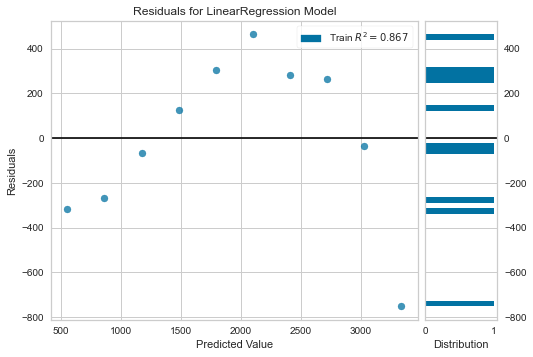

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [672]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor_health_plan)
visualizer.fit(x_health_plan, y_health_plan)
visualizer.poof()

## Houses Price Base / MAE 172.604 - 48%

# Multiple Regression

In [673]:
base_houses = pd.read_csv(PATH_DATA_BASE+r'house_prices.csv')
base_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [674]:
base_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [675]:
base_houses.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqf

In [676]:
base_houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [677]:
base_houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


## Heatmap

<AxesSubplot:>

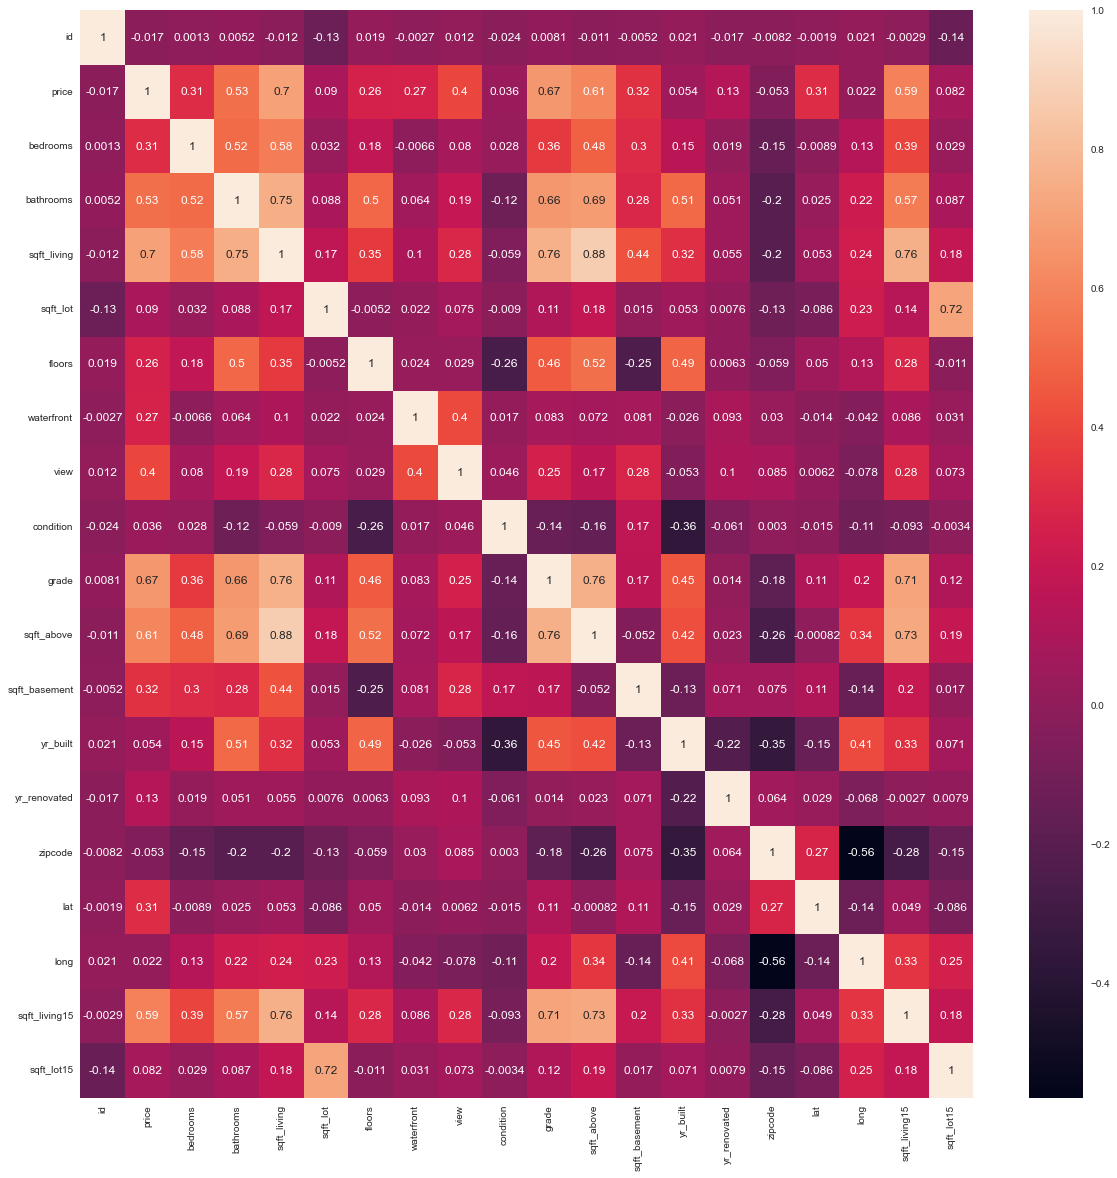

In [678]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(base_houses.corr(), annot = True)

In [679]:
x_houses = base_houses.iloc[:,5:6].values
x_houses

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [680]:
y_houses = base_houses.iloc[:,2].values
y_houses

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [681]:
from sklearn.model_selection import train_test_split
x_houses_training, x_houses_test, y_houses_training, y_houses_test = train_test_split(x_houses, y_houses, test_size=0.3, random_state=0)

In [682]:
x_houses_training.shape, y_houses_training.shape

((15129, 1), (15129,))

In [683]:
x_houses_test.shape, y_houses_test.shape

((6484, 1), (6484,))

In [684]:
from sklearn.linear_model import LinearRegression
simple_regression_houses = LinearRegression()
simple_regression_houses.fit(x_houses_training, y_houses_training)

LinearRegression()

In [685]:
simple_regression_houses.intercept_

-37893.59850106703

In [686]:
simple_regression_houses.coef_

array([278.32860644])

In [687]:
simple_regression_houses.score(x_houses_training, y_houses_training)

0.49453356717789776

In [688]:
simple_regression_houses.score(x_houses_test, y_houses_test)

0.48889929019453016

In [689]:
predictions = simple_regression_houses.predict(x_houses_training)
predictions

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

## Scatter 01

In [690]:
graphic = px.scatter(x = x_houses_training.ravel(), y = predictions)
graphic.show()

## Scatter 02

In [691]:
graphic1 = px.scatter(x = x_houses_training.ravel(), y = y_houses_training, width=1500, height=1000)
graphic2 = px.line(x = x_houses_training.ravel(), y = predictions, width=1500, height=1000)
graphic2.data[0].line.color = '#e80e27'
graphic3 = go.Figure(data=graphic1.data + graphic2.data)
graphic3.update_layout(
    autosize=True,
    width=1150,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x'
)
graphic3.show()

In [692]:
test_predictions = simple_regression_houses.predict(x_houses_test)
test_predictions

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [693]:
y_houses_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [694]:
abs(y_houses_test - test_predictions).mean()

172604.12889995414

In [695]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_houses_test, test_predictions)

172604.12889995414

In [696]:
mean_squared_error(y_houses_test, test_predictions)

70170013932.11592

In [697]:
np.sqrt(mean_squared_error(y_houses_test, test_predictions))


264896.23238565685

## Scatter 03

In [698]:
graphic1 = px.scatter(x = x_houses_test.ravel(), y = y_houses_test, width=1500, height=1000)
graphic2 = px.line(x = x_houses_test.ravel(), y = test_predictions, width=1500, height=1000)
graphic2.data[0].line.color = '#e80e27'
graphic3 = go.Figure(data=graphic1.data + graphic2.data)
graphic3.update_layout(
    autosize=True,
    width=1150,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x'
)
graphic3.show()

## Multiple Regression - Houses Price Base / MAE 123.888 - 68%

In [699]:
base_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [700]:
x_houses = base_houses.iloc[:, 3:19].values
x_houses

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [701]:
y_houses = base_houses.iloc[:, 2].values
y_houses

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [702]:
from sklearn.model_selection import train_test_split
x_houses_training, x_houses_test, y_houses_training, y_houses_test = train_test_split(x_houses, y_houses, test_size=0.3, random_state=0)

In [703]:
x_houses_training.shape, y_houses_training.shape

((15129, 16), (15129,))

In [704]:
x_houses_test.shape, y_houses_test.shape

((6484, 16), (6484,))

In [705]:
multiple_regression_houses = LinearRegression()
multiple_regression_houses.fit(x_houses_training, y_houses_training)

LinearRegression()

In [706]:
multiple_regression_houses.intercept_

5736222.703415447

In [707]:
multiple_regression_houses.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179158e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226267e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [708]:
len(multiple_regression_houses.coef_)

16

In [709]:
multiple_regression_houses.score(x_houses_training, y_houses_training)

0.7029888085955006

In [710]:
multiple_regression_houses.score(x_houses_test, y_houses_test)


0.6885414149062654

In [711]:
test_predictions = multiple_regression_houses.predict(x_houses_test)
test_predictions

array([ 383751.77768701, 1514216.17517451,  546921.96179115, ...,
        314968.57623274,  219405.5557356 ,  148128.83467042])

In [712]:
y_houses_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [713]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_houses_test, test_predictions)

123888.44377485904

In [714]:
mean_squared_error(y_houses_test, test_predictions)

42760757001.5364

In [715]:
np.sqrt(mean_squared_error(y_houses_test, test_predictions))

206786.74280895377

# Polynomial Regression

## Health Plan Base

In [716]:
base_health_plan2 = pd.read_csv(PATH_DATA_BASE+'plano_saude2.csv')
base_health_plan2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [717]:
x_health_plan2 = base_health_plan2.iloc[:,0:1].values
y_health_plan2 = base_health_plan2.iloc[:,1].values

In [718]:
x_health_plan2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [719]:
y_health_plan2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [720]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_health_plan2_poly = poly.fit_transform(x_health_plan2)

In [721]:
x_health_plan2.shape

(10, 1)

In [722]:
x_health_plan2_poly.shape

(10, 5)

In [723]:
x_health_plan2_poly

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [724]:
from sklearn.linear_model import LinearRegression
regressor_health_polynomial = LinearRegression()
regressor_health_polynomial.fit(x_health_plan2_poly, y_health_plan2)

LinearRegression()

In [725]:
regressor_health_polynomial.intercept_

16561.974637939904

In [726]:
regressor_health_polynomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [727]:
novo = [[40]]

In [728]:
novo = poly.transform(novo)
regressor_health_polynomial.predict(novo)

array([1335.33958016])

In [729]:
predictions = regressor_health_polynomial.predict(x_health_plan2_poly)
predictions

array([ 549.65035466,  345.85081577,  616.53845994,  975.83915951,
       1249.06759854, 1472.72727271, 1894.51048941, 2973.29836768,
       5379.16083826, 9993.35664352])

## Scatter 01

In [730]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2)
graphic.add_scatter(x = x_health_plan2.ravel(), y = predictions, name = 'Polynomial Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

## Houses Price Base / MAE 101.254 - 81,5%

In [731]:
x_houses_training.shape

(15129, 16)

In [732]:
x_houses_test.shape

(6484, 16)

In [733]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_houses_training_poly = poly.fit_transform(x_houses_training)
x_houses_test_poly = poly.fit_transform(x_houses_test)

In [734]:
x_houses_training_poly.shape

(15129, 153)

In [735]:
x_houses_test_poly.shape

(6484, 153)

In [736]:
regressor_houses_polynomial = LinearRegression()
regressor_houses_polynomial.fit(x_houses_training_poly, y_houses_training)

LinearRegression()

In [737]:
regressor_houses_polynomial.score(x_houses_training_poly, y_houses_training)

0.817932777820371

In [738]:
regressor_houses_polynomial.score(x_houses_test_poly, y_houses_test)

0.8152891607047749

In [739]:
predictions = regressor_houses_polynomial.predict(x_houses_test_poly)
predictions

array([ 386415.3822403 , 1988483.76950073,  577575.70069122, ...,
        432147.43639374,  237183.80749512,  123885.12888336])

In [740]:
y_houses_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [741]:
mean_absolute_error(y_houses_test, predictions)

101254.76292198576

# Decision Tree

## Health Plan Base

In [742]:
base_health_plan2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [743]:
x_health_plan2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [744]:
y_health_plan2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [745]:
from sklearn.tree import DecisionTreeRegressor
regressor_health_tree = DecisionTreeRegressor()
regressor_health_tree.fit(x_health_plan2, y_health_plan2)

DecisionTreeRegressor()

In [746]:
predictions = regressor_health_tree.predict(x_health_plan2)
predictions

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [747]:
regressor_health_tree.score(x_health_plan2, y_health_plan2)

1.0

## Scatter 01

In [748]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2)
graphic.add_scatter(x = x_health_plan2.ravel(), y = predictions, name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

In [749]:
x_tree_test = np.arange(min(x_health_plan2), max(x_health_plan2) + 0.1, 0.1)
x_tree_test

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [750]:
x_tree_test.shape

(451,)

In [751]:
x_tree_test = x_tree_test.reshape(-1,1)
x_tree_test

array([[18. ],
       [18.1],
       [18.2],
       [18.3],
       [18.4],
       [18.5],
       [18.6],
       [18.7],
       [18.8],
       [18.9],
       [19. ],
       [19.1],
       [19.2],
       [19.3],
       [19.4],
       [19.5],
       [19.6],
       [19.7],
       [19.8],
       [19.9],
       [20. ],
       [20.1],
       [20.2],
       [20.3],
       [20.4],
       [20.5],
       [20.6],
       [20.7],
       [20.8],
       [20.9],
       [21. ],
       [21.1],
       [21.2],
       [21.3],
       [21.4],
       [21.5],
       [21.6],
       [21.7],
       [21.8],
       [21.9],
       [22. ],
       [22.1],
       [22.2],
       [22.3],
       [22.4],
       [22.5],
       [22.6],
       [22.7],
       [22.8],
       [22.9],
       [23. ],
       [23.1],
       [23.2],
       [23.3],
       [23.4],
       [23.5],
       [23.6],
       [23.7],
       [23.8],
       [23.9],
       [24. ],
       [24.1],
       [24.2],
       [24.3],
       [24.4],
       [24.5],
       [24

In [752]:
x_tree_test.shape

(451, 1)

## Scatter 02

In [753]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2)
graphic.add_scatter(x = x_tree_test.ravel(), y = regressor_health_tree.predict(x_tree_test), name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

In [754]:
regressor_health_tree.predict([[40]])

array([1150.])

## Houses Price Base / MAE 100.263 - 74,7%

In [755]:
x_houses_training.shape

(15129, 16)

In [756]:
y_houses_training.shape

(15129,)

In [757]:
x_houses_test.shape

(6484, 16)

In [758]:
regressor_houses_tree = DecisionTreeRegressor()
regressor_houses_tree.fit(x_houses_training, y_houses_training)

DecisionTreeRegressor()

In [759]:
regressor_houses_tree.score(x_houses_training, y_houses_training)

0.9992712177726063

In [760]:
regressor_houses_tree.score(x_houses_test, y_houses_test)

0.7278254312194887

In [761]:
predictions = regressor_houses_tree.predict(x_houses_test)
predictions

array([ 288000., 2340000.,  483000., ...,  289000.,  197000.,  218000.])

In [762]:
y_houses_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [763]:
mean_absolute_error(y_houses_test, predictions)

100533.26118136953

# Random Forest Regression

## Health Plan Base

In [764]:
x_health_plan2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [765]:
y_health_plan2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [766]:
from sklearn.ensemble import RandomForestRegressor
regressor_health_random_forest = RandomForestRegressor(n_estimators=10, random_state=0)
regressor_health_random_forest.fit(x_health_plan2, y_health_plan2)

RandomForestRegressor(n_estimators=10, random_state=0)

In [767]:
regressor_health_random_forest.score(x_health_plan2, y_health_plan2)

0.970907451765773

## Scatter 01

In [768]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2)
graphic.add_scatter(x = x_tree_test.ravel(), y = regressor_health_random_forest.predict(x_tree_test), name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

In [769]:
regressor_health_random_forest.predict([[40]])

array([1124.])

## Houses Price Base / MAE 67.659 - 88,3%

In [770]:
x_houses_training

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [771]:
y_houses_training

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [772]:
regressor_houses_random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_houses_random_forest.fit(x_houses_training, y_houses_training)

RandomForestRegressor(random_state=0)

In [773]:
regressor_houses_random_forest.score(x_houses_training, y_houses_training)

0.9809250738045339

In [774]:
regressor_houses_random_forest.score(x_houses_test, y_houses_test)

0.883012629216071

In [775]:
predictions = regressor_houses_random_forest.predict(x_houses_test)
predictions

array([ 313481.58, 1628043.1 ,  531609.5 , ...,  366168.64,  231871.25,
        203161.46])

In [776]:
y_houses_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [777]:
mean_absolute_error(y_houses_test, predictions)

67659.67061608795

# SVM (Support vector machine)

## Health Plan Base

In [778]:
x_health_plan2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [779]:
y_health_plan2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [780]:
from sklearn.svm import SVR

### Linear Kernel

In [781]:
svr_health_regressor = SVR(kernel='linear')
svr_health_regressor.fit(x_health_plan2, y_health_plan2)

SVR(kernel='linear')

### Scatter 01

In [782]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2)
graphic.add_scatter(x = x_health_plan2.ravel(), y = svr_health_regressor.predict(x_health_plan2), name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

### Polynomial kernel

In [783]:
svr_health_regressor_poly = SVR(kernel='poly', degree=5)
svr_health_regressor_poly.fit(x_health_plan2, y_health_plan2)

SVR(degree=5, kernel='poly')

### Scatter 02

In [784]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2)
graphic.add_scatter(x = x_health_plan2.ravel(), y = svr_health_regressor_poly.predict(x_health_plan2), name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

### rbf Kernel

In [785]:
x_health_plan2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [786]:
y_health_plan2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [787]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_health_plan2_scaled = scaler_x.fit_transform(x_health_plan2)
scaler_y = StandardScaler()
y_health_plan2_scaled = scaler_y.fit_transform(y_health_plan2.reshape(-1,1))
print(x_health_plan2_scaled,'\n')
print(y_health_plan2_scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

[[-0.72401136]
 [-0.7065653 ]
 [-0.66818397]
 [-0.59839975]
 [-0.48674498]
 [-0.35415495]
 [-0.17620517]
 [ 0.18667281]
 [ 0.8914935 ]
 [ 2.63609918]]


In [788]:
svr_health_regressor_rbf = SVR(kernel='rbf')
svr_health_regressor_rbf.fit(x_health_plan2_scaled, y_health_plan2_scaled.ravel())

SVR()

### Scatter 03

In [789]:
graphic = px.scatter(x = x_health_plan2_scaled.ravel(), y = y_health_plan2_scaled.ravel())
graphic.add_scatter(x = x_health_plan2_scaled.ravel(), y = svr_health_regressor_rbf.predict(x_health_plan2_scaled), name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

In [790]:
age = [[40]]
age = scaler_x.transform(age)
age

array([[-0.03481553]])

In [791]:
scaler_y.inverse_transform([svr_health_regressor_rbf.predict(age)])

array([[1333.85650748]])

## Houses Price Base / MAE 83.000 - 73,4%

In [792]:
x_houses_training.shape, y_houses_training.shape

((15129, 16), (15129,))

In [793]:
x_houses_training

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [794]:
y_houses_training

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [795]:
x_houses_test.shape

(6484, 16)

In [796]:
scaler_x_houses = StandardScaler()
x_houses_training_scaled = scaler_x_houses.fit_transform(x_houses_training)
scaler_y_houses = StandardScaler()
y_houses_training_scaled = scaler_y_houses.fit_transform(y_houses_training.reshape(-1,1))
x_houses_test_scaled = scaler_x_houses.fit_transform(x_houses_test)
y_houses_test_scaled = scaler_y_houses.fit_transform(y_houses_test.reshape(-1,1))

In [797]:
x_houses_training_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [798]:
x_houses_test_scaled

array([[-1.54541664, -0.80087846, -0.72129133, ...,  0.86153518,
         1.16602473, -0.54260791],
       [ 0.68905353,  1.48142652,  2.85638133, ..., -1.36981856,
         0.53550005,  0.35029279],
       [-1.54541664, -1.77900916, -0.71024913, ...,  0.52683212,
         0.79363917, -1.06700991],
       ...,
       [-0.42818155,  0.50329582,  0.07374704, ..., -0.38430399,
        -0.79207257,  0.8817813 ],
       [-0.42818155, -0.47483489, -0.66608033, ..., -0.86776397,
        -1.41175108, -0.47174278],
       [-0.42818155, -1.45296559, -0.84275552, ...,  0.2479129 ,
        -1.80004438,  0.21564903]])

In [799]:
y_houses_training_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [800]:
y_houses_test_scaled

array([[-0.65279094],
       [ 2.80442566],
       [ 0.06267207],
       ...,
       [-0.42878706],
       [-0.73105736],
       [-0.89838556]])

In [801]:
svr_houses_regressor = SVR(kernel= 'rbf')
svr_houses_regressor.fit(x_houses_training_scaled, y_houses_training_scaled.ravel())

SVR()

In [802]:
svr_houses_regressor.score(x_houses_training_scaled, y_houses_training_scaled)

0.8123337393146999

In [803]:
svr_houses_regressor.score(x_houses_test_scaled, y_houses_test_scaled)

0.7339158652152075

In [804]:
predictions = svr_houses_regressor.predict(x_houses_test_scaled)
predictions

array([-0.54877296,  3.48844091,  0.01692247, ..., -0.43360248,
       -0.92110462, -1.041454  ])

In [805]:
y_houses_test_scaled

array([[-0.65279094],
       [ 2.80442566],
       [ 0.06267207],
       ...,
       [-0.42878706],
       [-0.73105736],
       [-0.89838556]])

In [806]:
y_houses_test_inverse = scaler_y_houses.inverse_transform(y_houses_test_scaled)
predictions_inverse = scaler_y_houses.inverse_transform(predictions.reshape(-1,1))

In [807]:
y_houses_test_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [808]:
predictions_inverse

array([[ 335541.70853831],
       [1831447.68122609],
       [ 545148.43144491],
       ...,
       [ 378215.7461407 ],
       [ 197581.92515722],
       [ 152988.95642719]])

In [809]:
mean_absolute_error(y_houses_test_inverse, predictions_inverse)

83085.30908154699

# Neural Network

## Health Plan Base

In [810]:
x_health_plan2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [811]:
y_health_plan2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [812]:
from sklearn.neural_network import MLPRegressor
neural_network_regressor_health = MLPRegressor(max_iter=1000)
neural_network_regressor_health.fit(x_health_plan2_scaled, y_health_plan2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [813]:
neural_network_regressor_health.score(x_health_plan2_scaled, y_health_plan2_scaled.ravel())

0.9597960813008377

## Scatter 01

In [814]:
graphic = px.scatter(x = x_health_plan2_scaled.ravel(), y = y_health_plan2_scaled.ravel())
graphic.add_scatter(x = x_health_plan2_scaled.ravel(), y = neural_network_regressor_health.predict(x_health_plan2_scaled), name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

In [815]:
age = [[40]]
age = scaler_x.transform(age)
age

array([[-0.03481553]])

In [816]:
scaler_y.inverse_transform([neural_network_regressor_health.predict(age)])

array([[1109.89131786]])

In [821]:
predictions_inverse = scaler_y.inverse_transform([neural_network_regressor_health.predict(x_health_plan2_scaled)]).ravel()


## Scatter 02 

In [822]:
graphic = px.scatter(x = x_health_plan2.ravel(), y = y_health_plan2.ravel())
graphic.add_scatter(x = x_health_plan2.ravel(), y = predictions_inverse
, name = 'Regression')
graphic.update_layout(
    autosize=True,
    width=1120,
    height=650,
    paper_bgcolor="LightSteelBlue",
    barmode='group', 
    hovermode='x',
)
graphic.show()

## Houses Price Base / MAE 74.795 - 88,3%

In [824]:
x_houses_training_scaled.shape, y_houses_training_scaled.shape

((15129, 16), (15129, 1))

In [825]:
x_houses_test_scaled.shape, y_houses_test_scaled.shape

((6484, 16), (6484, 1))

In [829]:
neural_network_regressor_houses = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9), 
                                                         verbose=True, random_state=0)
neural_network_regressor_houses.fit(x_houses_training_scaled, y_houses_training_scaled.ravel())

Iteration 1, loss = 0.37910159
Iteration 2, loss = 0.26639695
Iteration 3, loss = 0.21159231
Iteration 4, loss = 0.17943246
Iteration 5, loss = 0.15735747
Iteration 6, loss = 0.13903747
Iteration 7, loss = 0.12770952
Iteration 8, loss = 0.12049088
Iteration 9, loss = 0.11489875
Iteration 10, loss = 0.11152280
Iteration 11, loss = 0.10755260
Iteration 12, loss = 0.10552930
Iteration 13, loss = 0.10181224
Iteration 14, loss = 0.09982654
Iteration 15, loss = 0.09764390
Iteration 16, loss = 0.09560788
Iteration 17, loss = 0.09399071
Iteration 18, loss = 0.09219530
Iteration 19, loss = 0.09150954
Iteration 20, loss = 0.08942144
Iteration 21, loss = 0.08779315
Iteration 22, loss = 0.08677824
Iteration 23, loss = 0.08615531
Iteration 24, loss = 0.08470873
Iteration 25, loss = 0.08390764
Iteration 26, loss = 0.08275459
Iteration 27, loss = 0.08191097
Iteration 28, loss = 0.08077099
Iteration 29, loss = 0.07996919
Iteration 30, loss = 0.07920827
Iteration 31, loss = 0.07830064
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000, random_state=0,
             verbose=True)

In [830]:
neural_network_regressor_houses.score(x_houses_training_scaled, y_houses_training_scaled.ravel())

0.8990079088242111

In [831]:
neural_network_regressor_houses.score(x_houses_test_scaled, y_houses_test_scaled.ravel())


0.8834930956511157

In [834]:
predictions = neural_network_regressor_houses.predict(x_houses_test_scaled)
predictions

array([-0.64674034,  3.54161224, -0.01839941, ..., -0.45661835,
       -0.87563477, -0.92569808])

In [835]:
y_houses_test_scaled

array([[-0.65279094],
       [ 2.80442566],
       [ 0.06267207],
       ...,
       [-0.42878706],
       [-0.73105736],
       [-0.89838556]])

In [847]:
predictions_inverse = scaler_y_houses.inverse_transform(predictions.reshape(-1,1))
predictions_inverse

array([[ 299241.92405521],
       [1851149.21531261],
       [ 532060.6428163 ],
       ...,
       [ 369687.68963254],
       [ 214429.83580146],
       [ 195879.9132817 ]])

In [846]:
y_houses_test_inverse = scaler_y_houses.inverse_transform(y_houses_test_scaled)
y_houses_test_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [848]:
mean_absolute_error(y_houses_test_inverse, predictions_inverse)

74795.01706549825

In [11]:
table = [[2,3,4,5,6], # Manha
                      [0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,1],
                      [0,0,0,0,1],
                      [0,0,0,0,0],
                      # Tarde
                      [0,0,0,0,0],
                      [1,1,1,1,0],
                      [1,1,1,1,0],
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [1,1,1,1,0],
                      # Noite
                      [1,1,1,1,0],
                      [1,1,1,0,0],
                      [1,1,1,0,0],
                      [0,0,1,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0]]
table = pd.DataFrame(table)

In [12]:
table

,0,1,2,3,4
0,2,3,4,5,6
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,1
6,0,0,0,0,0
7,0,0,0,0,0
8,1,1,1,1,0
9,1,1,1,1,0
